In [2]:
import numpy as np
from PIL import Image
from matplotlib.pyplot import imshow

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import pylab as pt

## Task1 - Image Binarization using a predefined global Threshold

In [3]:
im = Image.open("B1.png")

In [4]:
im.show()
im_array = np.asarray(im)

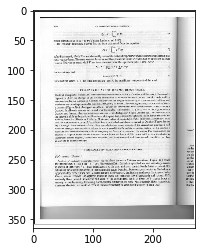

In [5]:
imshow(im_array)

In [6]:
print(len(im_array))
print(im_array.shape)

365
(365, 271, 3)


In [310]:
def convert_to_grayscale(image):
    #Converting the Image into the Grayscale image
    rgb = np.asarray(image)
    #Seperating the R,G,B arrays into separates r,g,b numpy array
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]

    #finally adding all r,g,b to gray plus multiplying with some parameters
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray

In [8]:
# Function for binary threshold
def binary_threshold(image,threshold):
    #initializing a image size numpy array of zeros
    binary = np.zeros(image.shape, dtype = 'int')
    #iterating over every row of gray scale image
    for i in range(binary.shape[0]):
        #iterating over every element of the row
        for j in range(binary.shape[1]):
            #check the pixel particular
            if image[i][j] < threshold:
                binary[i][j] = 0
            else:
                binary[i][j] = 1
    return binary


In [313]:
#predifined threshold value
threshold_value =127
gray = convert_to_grayscale(im)
image = binary_threshold(gray,threshold_value)


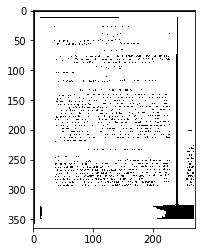

In [314]:
pt.imshow(image, cmap = 'gray')

## Task2 Creating Intensity Histogram from the gray scale image

In [324]:
# Creating the histogram structure
histo = {}
for i in range(256):
    histo[i] = 0
    
for row in gray:
    for value in row:
        #rounding off the value to neart grayscale interger value
        histo[int(round(value))] += 1

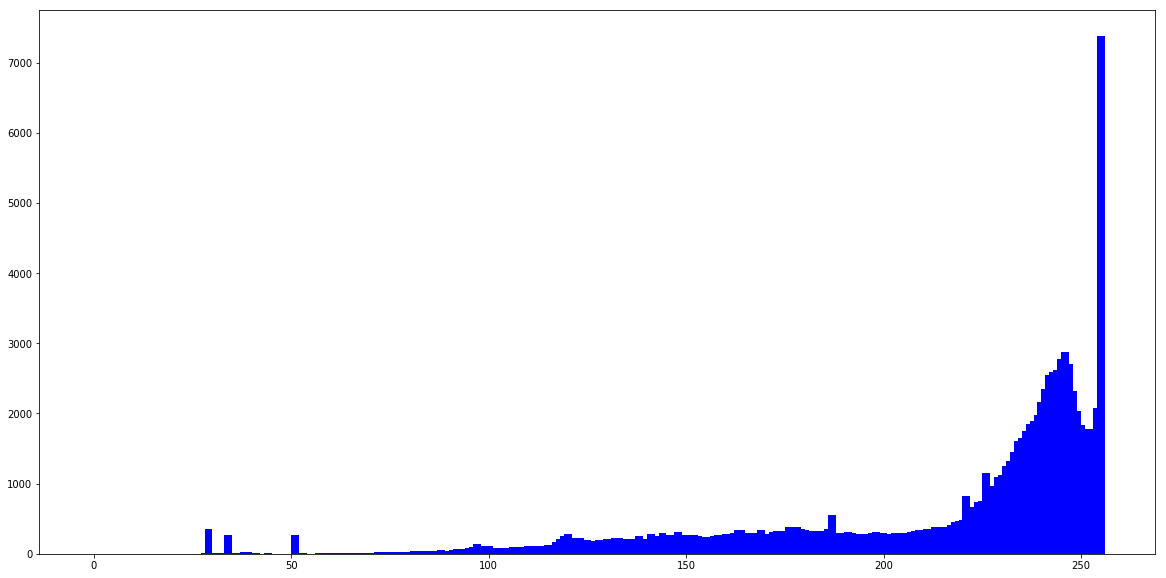

In [325]:
#plotting the histogram
plt.bar(histo.keys(), histo.values(), width = 2, color='b')
plt.gcf().set_size_inches(20, 10)

## Task3 Recursive XY-cut algorithm

In [326]:
im2 = Image.open("XY-cutss.png")

In [328]:
gray2 = convert_to_grayscale(im2)



In [340]:
xyimage =  binary_threshold(gray2,threshold_value)
xyimage = xyimage[10:,]
print(xyimage.shape)

(524, 769)


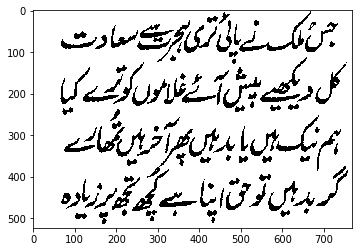

In [341]:
pt.imshow(xyimage, cmap = 'gray')

In [342]:
#initializing the cuts images variables
cut1 = []
cut2 = []
cut3 = []
cut4 = []
row_index = 0
cut = []


#getting the sum for every row of the binary image 
for row in xyimage:
    cut.append(sum(row))
    


#iterating the rows of the image    
for row in xyimage:
    #the index of row
    row_index += 1
    # checking if the row has maximum white pixels in by max(cut) function
    # row index > 40 for starting the check after 40 rows 
    if sum(row) > max(cut) - 20 and row_index > 40 :
        # making the first cut from 0 to row_index
        cut1 = xyimage[:row_index,]
        break
# similar distance cuts from row_index 
cut2 = xyimage[row_index:row_index*2,]
cut3 = xyimage[row_index*2:row_index*3,]
cut4 = xyimage[row_index*3:row_index*4,]
        


    

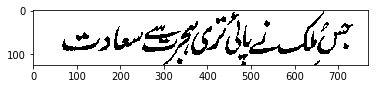

In [343]:
pt.imshow(cut1, cmap = 'gray')

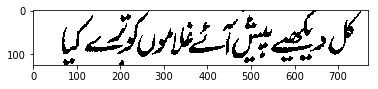

In [344]:
pt.imshow(cut2, cmap = 'gray')

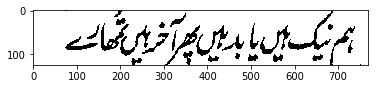

In [345]:
pt.imshow(cut3, cmap = 'gray')

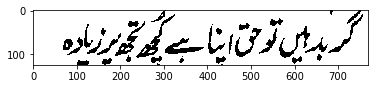

In [346]:
pt.imshow(cut4, cmap = 'gray')